# Capture Images from Webcam

This script captures video from webcam, detects face area and shows it to user in a window. Video (of face area detected) is shown to user until user presses `ESC (or T/F/Q)` key. When an `ESC (or T/F/Q)` is pressed then video is exited and an image of current state is saved in current working directory. This is to show that when a user will answer the question by pressing some key/button then as soon as a button/key is pressed, user's image will be saved. 

In [1]:
import cv2

class VideoCamera:
    def __init__(self):
        #passing 0 to VideoCapture means fetch video from webcam
        self.video_capture = cv2.VideoCapture(0)
                
    #release resources like webcam
    def __del__(self):
        self.video_capture.release()
        
    def read_image(self):
        #get a single frame of video
        ret, frame = self.video_capture.read()
        #return the frame to user
        return ret, frame
    
    #method to release webcam manually 
    def release(self):
        self.video_capture.release()

In [2]:
def detect_face(img):
    #load OpenCV face detector, I am using LBP which is fast
    #there is also a more accurate but slow Haar classifier
    face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')
    
#     img_copy = np.copy(colored_img)
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    #result is a list of faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5);
    
    #if no faces are detected then return original img
    if (len(faces) == 0):
        return img
    
    #under the assumption that there will be only one face,
    #extract the face area
    (x, y, w, h) = faces[0]
    
    #return only the face part of the image
    return img[y:y+w, x:x+h]

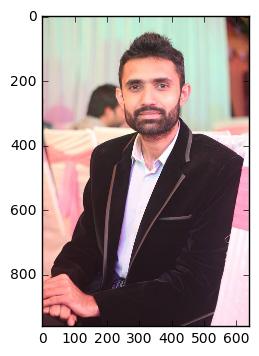

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#opencv loads an image into BGR color space,
#I use this method to convert it to RGB
def convert2RGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#load a test image and display it
img = cv2.imread('data/test2.jpg')
plt.imshow(convert2RGB(img))

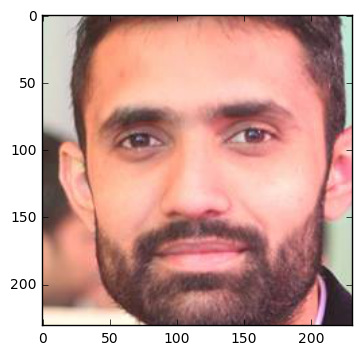

In [4]:
#detect the face and get the face area
face = detect_face(img)
#display detected face
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))

In [5]:
#create a Video camera instance
camera = VideoCamera()
cv2.namedWindow("Webcam feed", 0)

while (True):
    #read a video frame
    ret, frame = camera.read_image()

    if(ret == False):
        print('Video capture failed')
        break
        
    face = detect_face(frame)

    #display the image to user
    cv2.imshow("Webcam feed", face)
    #wait for 100ms for user to press a key
    key = cv2.waitKey(100)
    
    #if user pressed an ESC (or T/F/Q) key then exit and save the img
    if(key in [27, ord('T'), ord('F'), ord('t'), ord('f'), ord('q'), ord('Q')]):
        cv2.imwrite('img.jpg', face)
        break;

# release resources 
camera.release()
cv2.waitKey(100)
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.destroyAllWindows()

In [6]:
camera.release()